# $(g-2)_\tau$ with ALPs

1911.06579

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

In [2]:
fa = 1000
mtau = 1.77686
alpha_e = 1/137.035999084
max_atau = (8*np.pi/3)**0.5*fa/(2*mtau)

In [3]:
max_atau

814.4718824873852

In [4]:
def h1heavy(x):
    return 1 + 2*x - (x-1) * x*np.log(x)+2*x*(x-3)*(x/(x-4))**0.5*np.log((x**0.5+(x-4)**0.5)/2)

In [5]:
def h1light(x):
    return 1 + 2*x - (x-1) * x*np.log(x)+2*x*(x-3)*(x/(4-x))**0.5*np.arccos(x**0.5/2)

In [6]:
def h2heavy(x):
    return 1 - x/3 + x**2/6*np.log(x)-(x+2)/3*(x-4)**0.5*x**0.5*np.log((x**0.5+(x-4)**0.5)/2)

In [7]:
def h2light(x):
    return 1 - x/3 + x**2/6*np.log(x)+(x+2)/3*(4-x)**0.5*x**0.5*np.arccos(x**0.5/2)

In [8]:
def h2(x):
    if x > 2*mtau:
        return h2heavy(x)
    else:
        return h2light(x)

In [9]:
def F(z, x):
    yz = z*(1-z)*x
    return (h2(x/yz)-h2(x))/(1-yz)

In [15]:
def Delta_atau(atau, ma):
    if ma > 2*mtau:
        h1 = h1heavy
    else:
        h1 = h1light
    x = ma**2/mtau**2
    return - mtau**2/(4*np.pi**2*fa**2)*atau**2*(h1(x)-2*alpha_e/np.pi*(np.log(fa**2/mtau**2) - h2(x)+quad(F, 0, 1, x)))[0]

In [11]:
x_atau = np.power(10, np.linspace(-1, np.log10(max_atau), 50))

In [16]:
y_m0 = [Delta_atau(atau, 1e-8) for atau in x_atau]
y_m1GeV = [Delta_atau(atau, 1) for atau in x_atau]
y_m10GeV = [Delta_atau(atau, 10) for atau in x_atau]

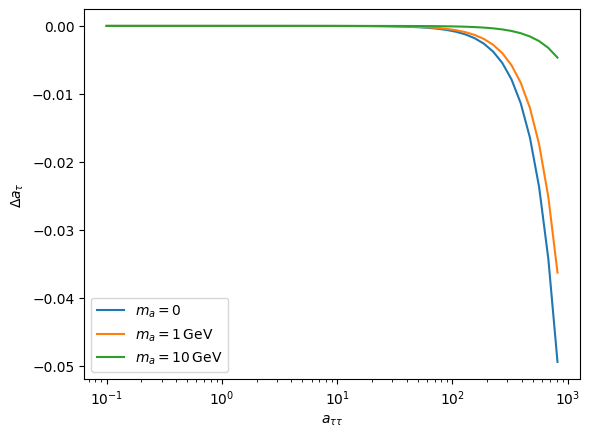

In [17]:
plt.semilogx(x_atau, y_m0, label = r"$m_a = 0$")
plt.semilogx(x_atau, y_m1GeV, label = r"$m_a = 1\,\mathrm{GeV}$")
plt.semilogx(x_atau, y_m10GeV, label = r"$m_a = 10\,\mathrm{GeV}$")
plt.xlabel(r"$a_{\tau\tau}$")
plt.ylabel(r"$\Delta a_\tau$")
plt.legend()
plt.show()


In [18]:
x_ma = np.power(10, np.linspace(-8, 1, 50))

In [19]:
y_a1 = [Delta_atau(0.8, ma) for ma in x_ma]
y_a10 = [Delta_atau(8, ma) for ma in x_ma]
y_a100 = [Delta_atau(80, ma) for ma in x_ma]
y_a1000 = [Delta_atau(800, ma) for ma in x_ma]

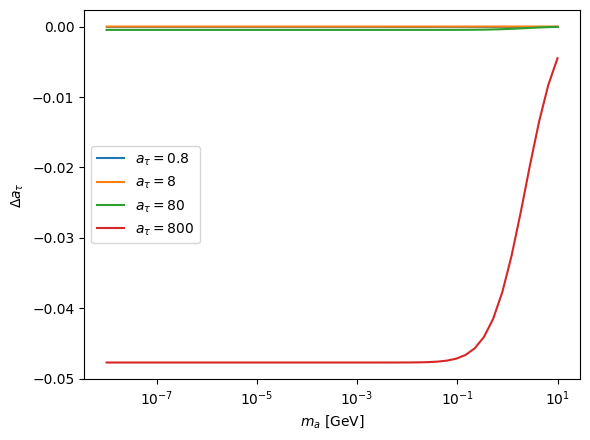

In [20]:
plt.semilogx(x_ma, y_a1, label=r"$a_\tau = 0.8$")
plt.semilogx(x_ma, y_a10, label=r"$a_\tau = 8$")
plt.semilogx(x_ma, y_a100, label=r"$a_\tau = 80$")
plt.semilogx(x_ma, y_a1000, label=r"$a_\tau = 800$")
plt.xlabel(r"$m_a$ [GeV]")
plt.ylabel(r"$\Delta a_\tau$")
plt.legend()
plt.show()